In [ ]:
# p.s the code used below is not fully mine.

# The LMS algorithm can be considered as the most basic and useful algorithm in machine learning
# LMS is also very common in the field of communication signal processing, such as adaptive filters.

In [10]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa


In [11]:
#pa.filters.FilterLMS(n) # where n is the size of the filter(number of taps)

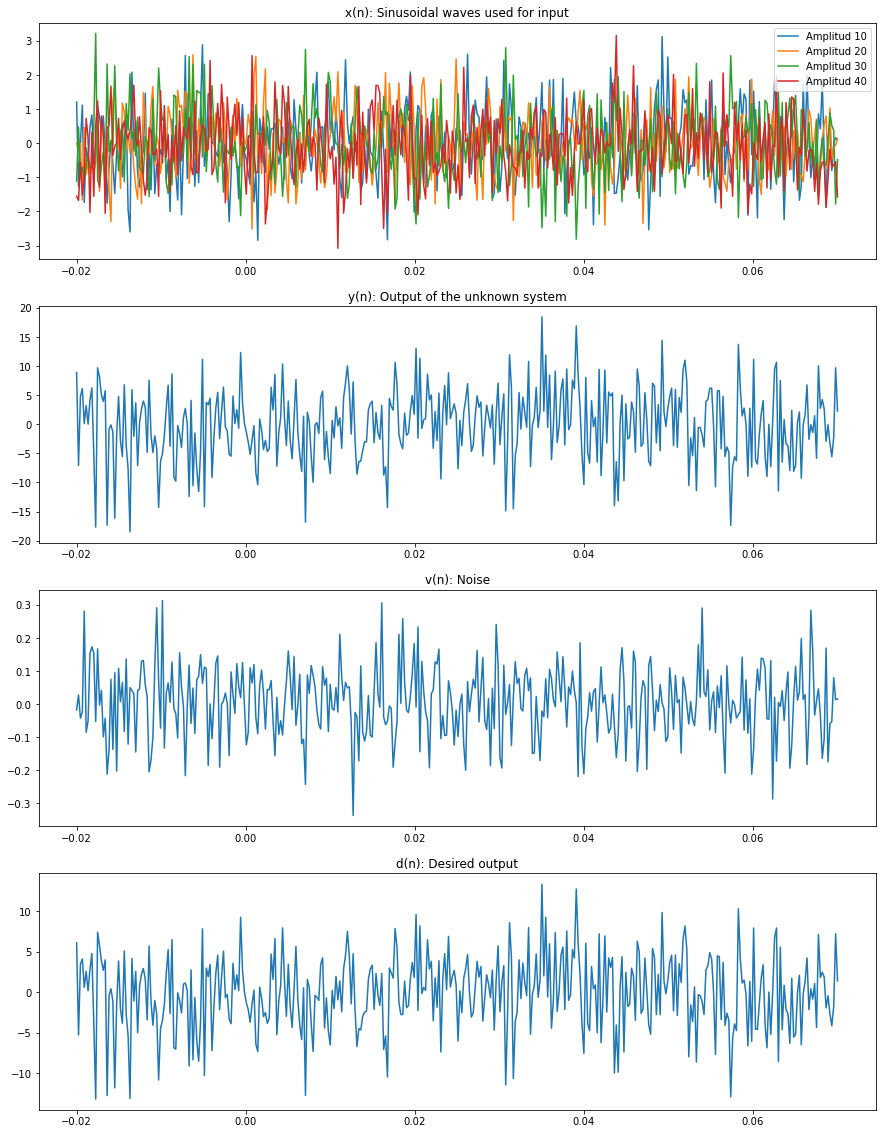

In [19]:
# creation data
N = 400
t = np.linspace(-0.02, 0.07, N)
x = np.random.normal(0, 1, (N, 4)) #input matrix
v = np.random.normal(0, 0.1, N) #noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target
y = 3*x[:,0] + 0.2*x[:,1] - 5.3*x[:,2] + 0.4*x[:,3]#output of the unknown system h(n)identification

plt.figure(figsize=(15,20))
plt.subplot(411)
plt.plot(t,x)
plt.legend(('Amplitud 10', 'Amplitud 20', 'Amplitud 30', 'Amplitud 40'),
loc='upper right')
plt.title('x(n): Sinusoidal waves used for input')
plt.subplot(412)
plt.plot(t,y)
plt.title('y(n): Output of the unknown system')
plt.subplot(413)
plt.plot(t,v)
plt.title('v(n): Noise')
plt.subplot(414)
plt.plot(t,d)
plt.title('d(n): Desired output')

plt.show()

# Filtering

In [20]:
f = pa.filters.FilterLMS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x) #This function filters multiple samples in a row.

# filter LMS represents an adaptive LMS filter
# `n` : length of filter (integer) - how many input is input array
# `mu` : learning rate (float). Also known as step size. If it is too slow,
# the filter may have bad performance. If it is too high,
# the filter will be unstable. The default value can be unstable.
# `w` : initial weights of filter. "random" : creates random weights

#`d` : desired value (1 dimensional array of lengh N)
#`x` : input matrix (2-dimensional array of shape (N,4)). 

# retunrs y` : output value (1 dimensional array).The size corresponds with the desired value.
#`e` : filter error for every sample (1 dimensional array).The size corresponds with the desired value.
# `w` : history of all weights (2 dimensional array).Every row is set of the weights for given sample.

In [21]:
error=10*np.log10(e**2)

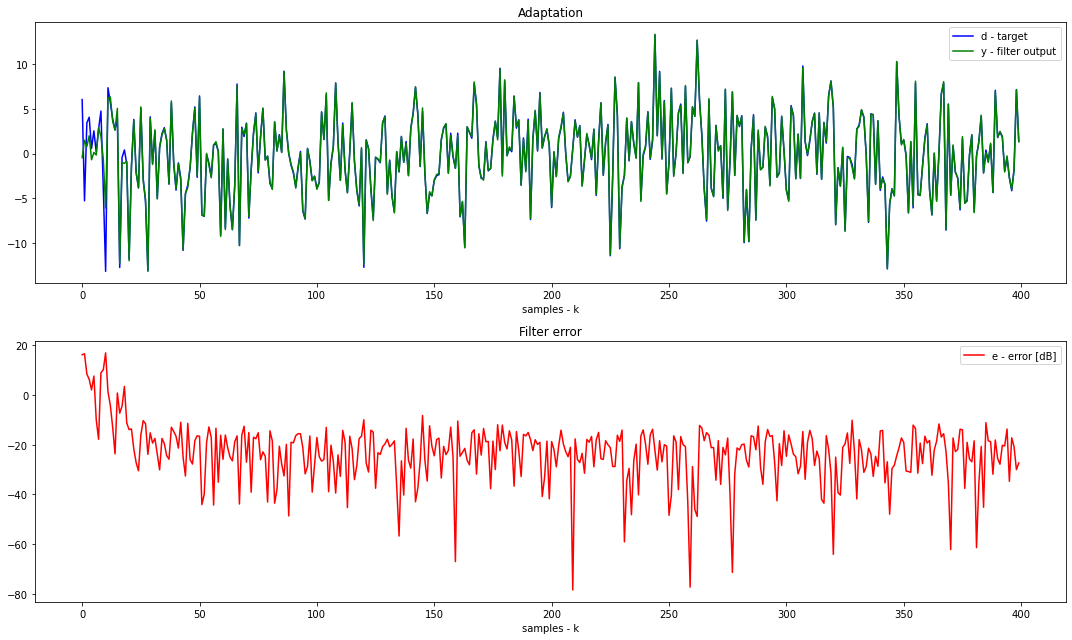

maximum absolute error= 78.44716240226803
average of the last 50 points of the error= -24.43663917315366


In [23]:
# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")#desired output
plt.plot(y,"g", label="y - filter output");plt.legend()#filter output
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")#error
plt.plot(error,"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()
print('maximum absolute error=', max(abs(error)))
print('average of the last 50 points of the error=', np.mean(error[N-50:N]))

# when mu is 0.01

In [24]:
f = pa.filters.FilterLMS(n=4, mu=0.01, w="random")
y, e, w = f.run(d, x)
error=10*np.log10(e**2)

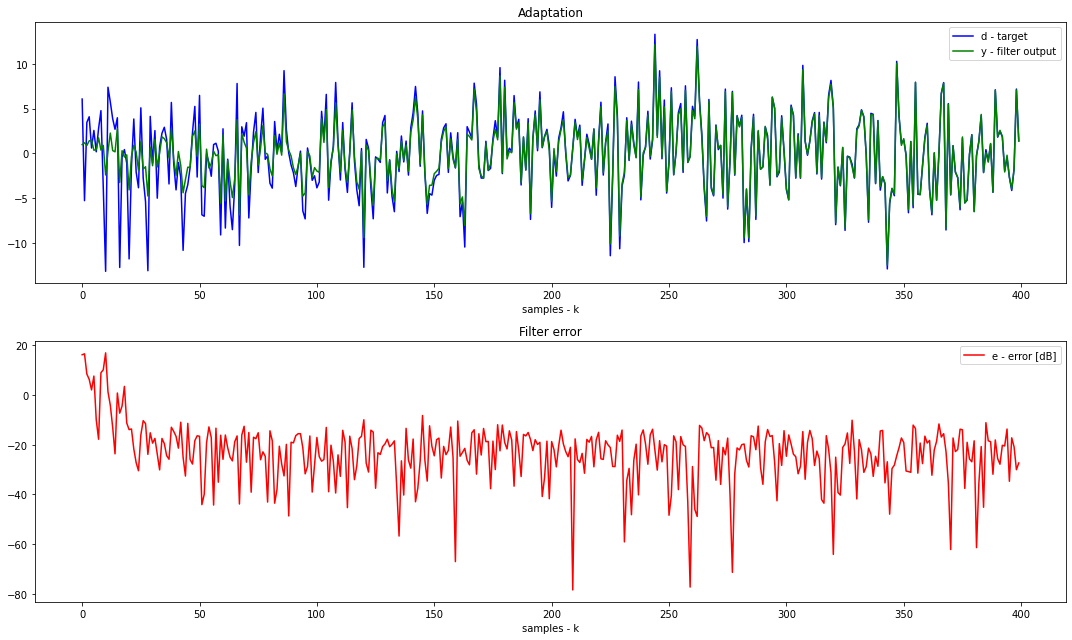

maximum absolute error= 78.44716240226803
average of the last 50 points of the error= -24.43663917315366


In [25]:
# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")#desired output
plt.plot(y,"g", label="y - filter output");plt.legend()#filter output
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")#error
plt.plot(error,"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()
print('maximum absolute error=', max(abs(error)))
print('average of the last 50 points of the error=', np.mean(error[N-50:N]))

# when mu = 0.001

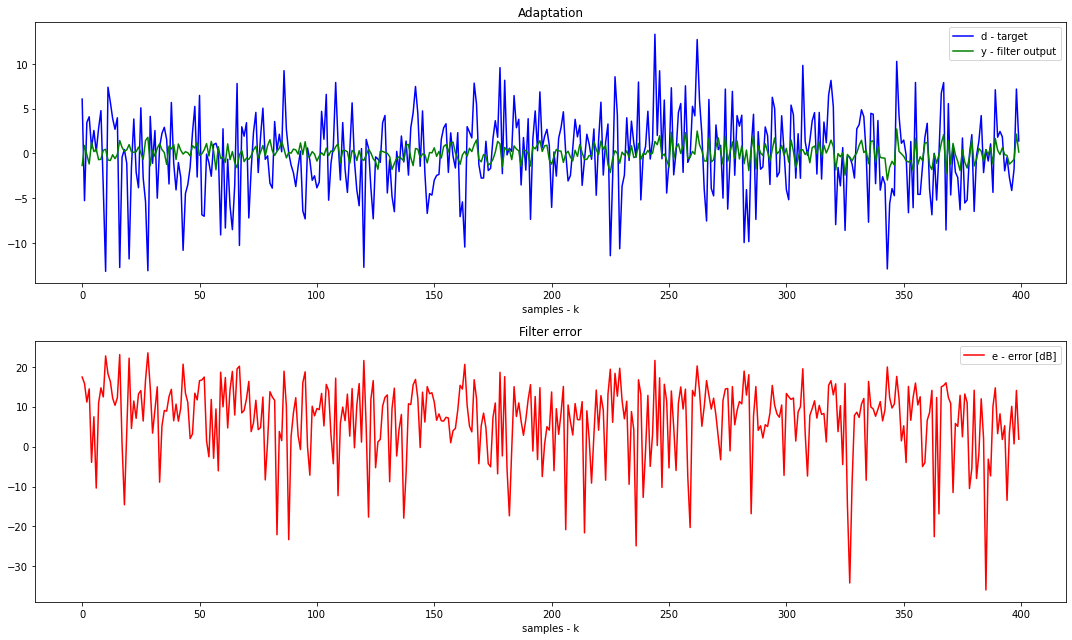

maximum absolute error= 35.88476413568962
average of the last 50 points of the error= 3.822844543563233


In [31]:
f = pa.filters.FilterLMS(n=4, mu=0.001, w="random")
y, e, w = f.run(d, x)
error=10*np.log10(e**2)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")#desired output
plt.plot(y,"g", label="y - filter output");plt.legend()#filter output
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")#error
plt.plot(error,"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()
print('maximum absolute error=', max(abs(error)))
print('average of the last 50 points of the error=', np.mean(error[N-50:N]))

# when mu = 0.0001

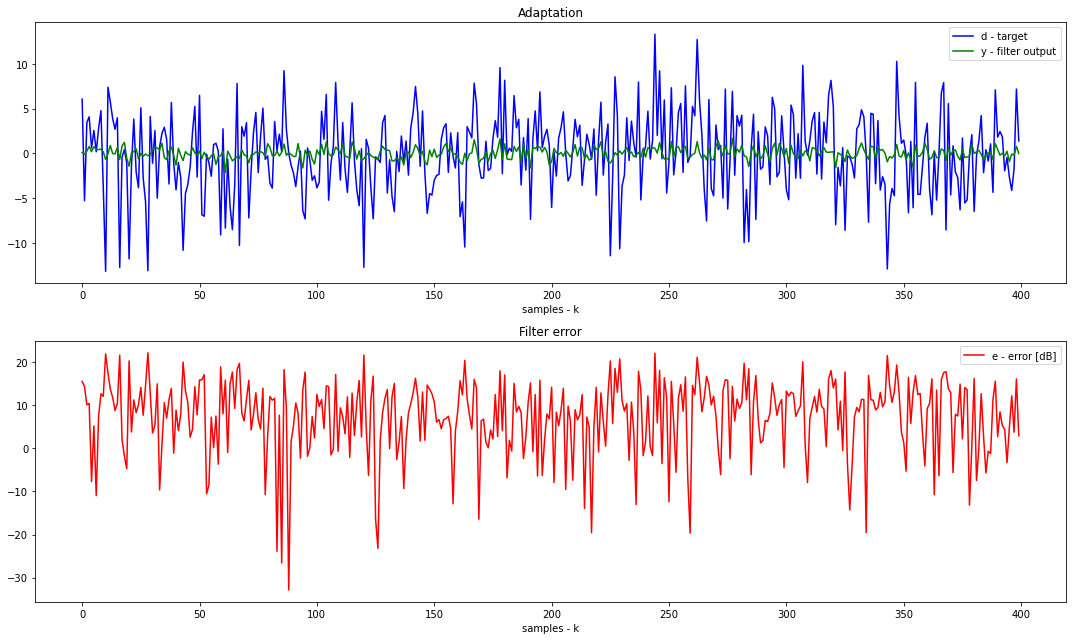

maximum absolute error= 32.873850721575984
average of the last 50 points of the error= 6.527509069426791


In [30]:
f = pa.filters.FilterLMS(n=4, mu=0.0001, w="random")
y, e, w = f.run(d, x)
error=10*np.log10(e**2)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")#desired output
plt.plot(y,"g", label="y - filter output");plt.legend()#filter output
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")#error
plt.plot(error,"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()
print('maximum absolute error=', max(abs(error)))
print('average of the last 50 points of the error=', np.mean(error[N-50:N]))

LMS adaptative filter should make ‘y’ as close to ‘d’ as possible, and stabilize the error plot as close to zero as possible. For this reason I also print the maximum absolute error and the average of the last 50 points of the error. The best is the othe with smaller error and more similarity of ‘y’ and ‘d’.

# References
-[1] S. Haykin: Adaptative Filter Theory, Hamilton, 2014, ISBN 978-0-132-67145-3
- [2] https://matousc89.github.io/padasip/sources/filters/lms.html